# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w~puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [1]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
import math

if not os.path.exists("ainvert.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/ainvert.py --no-check-certificate
from ainvert import A_invert

In [2]:
def bilinearInterpolation(image, coef_x, coef_y):
    arith_op = 0
    mem_acc = 0
    
    (Y, X) = image.shape
    new_Y, new_X = int(Y * coef_y), int(X * coef_x)
    new_image = np.zeros((new_Y, new_X))
    for y in range(new_Y):
        for x in range(new_X):
            x_A = math.floor(1/coef_x/2 - 1/2 + x/coef_x)
            y_A = math.floor(1/coef_y/2 - 1/2 + y/coef_y)
            arith_op += 12
            mem_acc += 6
            A = [y_A, x_A]
            B = [y_A, x_A+1]
            C = [y_A+1, x_A+1]
            D = [y_A+1, x_A]
            
            if y_A == -1:
                A[0] += 1
                B[0] += 1
                arith_op += 2
                mem_acc += 2
            if x_A == -1:
                A[1] += 1
                D[1] += 1
                arith_op += 2
                mem_acc += 2
            if y_A == Y-1:
                C[0] -= 1
                D[0] -= 1
                arith_op += 2
                mem_acc += 2
            if x_A == X-1:
                B[1] -= 1
                C[1] -= 1
                arith_op += 2
                mem_acc += 2
            mem_acc += 4
            
            f_A = image[A[0], A[1]]
            f_B = image[B[0], B[1]]
            f_C = image[C[0], C[1]]
            f_D = image[D[0], D[1]]
            mem_acc += 8
            
            i = (coef_x-1)/coef_x/(-2) + x/coef_x - x_A
            j = (coef_y-1)/coef_y/(-2) + y/coef_y - y_A
            arith_op += 12
            mem_acc += 10

            new_image[y, x] = np.array([1-i, i]) @ np.array([[f_A, f_D], [f_B, f_C]]) @ np.array([1-j, j]).T
            arith_op += 16
            mem_acc += 8
            
    return new_image, arith_op, mem_acc

In [3]:
def bicubicInterpolation(image, coef_x, coef_y):
    arith_op = 0
    mem_acc = 0
    
    (Y, X) = image.shape
    new_Y, new_X = int(Y * coef_y), int(X * coef_x)
    new_image = np.zeros((new_Y, new_X))
    
    for y in range(new_Y):
        for x in range(new_X):
            x_A = math.floor(1/coef_x/2 - 1/2 + x/coef_x)
            y_A = math.floor(1/coef_y/2 - 1/2 + y/coef_y)
            arith_op += 12
            mem_acc += 6
            A = [y_A, x_A]
            B = [y_A, x_A+1]
            C = [y_A+1, x_A+1]
            D = [y_A+1, x_A]
            
            if y_A == -1:
                A[0] += 1
                B[0] += 1
                arith_op += 2
                mem_acc += 2
            if x_A == -1:
                A[1] += 1
                D[1] += 1
                arith_op += 2
                mem_acc += 2
            if y_A == Y-1:
                C[0] -= 1
                D[0] -= 1
                arith_op += 2
                mem_acc += 2
            if x_A == X-1:
                B[1] -= 1
                C[1] -= 1
                arith_op += 2
                mem_acc += 2
            mem_acc += 4
            
            f_A = image[A[0], A[1]].astype(np.float32)
            f_B = image[B[0], B[1]].astype(np.float32)
            f_C = image[C[0], C[1]].astype(np.float32)
            f_D = image[D[0], D[1]].astype(np.float32)
            mem_acc += 8
            
            A_left =  image[A[0], A[1]-1].astype(np.float32) if A[1]-1 >= 0  else image[A[0], A[1]].astype(np.float32)
            A_up =    image[A[0]-1, A[1]].astype(np.float32) if A[0]-1 >= 0  else image[A[0], A[1]].astype(np.float32)
            B_up =    image[B[0]-1, B[1]].astype(np.float32) if B[0]-1 >= 0  else image[B[0], B[1]].astype(np.float32)
            B_right = image[B[0], B[1]+1].astype(np.float32) if B[1]+1 < X-1 else image[B[0], B[1]].astype(np.float32)
            C_right = image[C[0], C[1]+1].astype(np.float32) if C[1]+1 < X-1 else image[C[0], C[1]].astype(np.float32)
            C_down =  image[C[0]+1, C[1]].astype(np.float32) if C[0]+1 < Y-1 else image[C[0], C[1]].astype(np.float32)
            C_right_down = image[C[0]+1, C[1]+1].astype(np.float32) if C[0]+1 < Y-1 and C[1]+1 < X-1 else image[C[0], C[1]].astype(np.float32)
            D_down =  image[D[0]+1, D[1]].astype(np.float32) if D[0]+1 < Y-1 else image[D[0], D[1]].astype(np.float32)
            D_left =  image[D[0], D[1]-1].astype(np.float32) if D[1]-1 >= 0  else image[D[0], D[1]].astype(np.float32)
            arith_op += 24
            mem_acc += 28
            
            A_x = (f_B - A_left) / 2
            A_y = (f_D - A_up) / 2
            A_xy = (f_C - A_left - A_up + f_A) / 4
            B_x = (f_A - B_right) / 2
            B_y = (f_C - B_up) / 2
            B_xy = (C_right - f_A - B_up + f_B) / 4
            C_x = (f_D - C_right) / 2
            C_y = (f_B - C_down) / 2
            C_xy = (C_right_down - f_D - f_B + f_C) / 4
            D_x = (f_C - D_left) / 2
            D_y = (f_A - D_down) / 2
            D_xy = (C_down - D_left - f_A + f_D) / 4
            arith_op += 32
            mem_acc += 32


            
            x_vector = np.array([f_A, f_B, f_D, f_C, A_x, B_x, D_x, C_x, A_y, B_y, D_y, C_y, A_xy, B_xy, D_xy, C_xy])
            a = (A_invert @ x_vector.T).T.reshape((4, 4), order='F')
            arith_op += 16*15*16
            mem_acc += 16*16+16
            
            i = (coef_x-1)/coef_x/(-2) + x/coef_x - x_A
            j = (coef_y-1)/coef_y/(-2) + y/coef_y - y_A
            arith_op += 12
            mem_acc += 10
            
            for k in range(4):
                for l in range(4):
                    new_image[y, x] += a[k, l] * i**k * j**l
                    arith_op += 6
                    mem_acc += 10
            if new_image[y, x] < 0:
                new_image[y, x] = 0
            new_image[y, x] = new_image[y, x].astype(np.uint8)
                    
    return new_image, arith_op, mem_acc

In [4]:
def read(image: str):
    I = cv2.imread(image)
    I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY) 
    return I


def display(I):
    plt.figure(figsize=(I.shape[0]/100,I.shape[1]/100), dpi=200)
    plt.imshow(I, cmap ="gray")
    plt.xticks([]), plt.yticks([])
    plt.show()

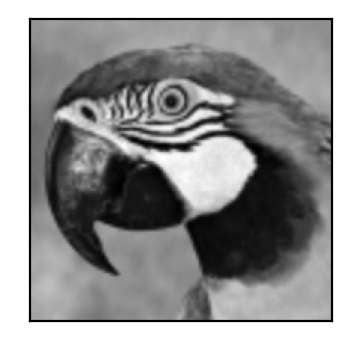

Interpolacja dwuliniowa
Liczba operacji arytmetycznych: 1601600
Liczba dostępów do pamięci: 1441600


In [5]:
I = read('parrot.bmp')
I_, arith_op, mem_acc = bilinearInterpolation(I, 2, 2)
display(I_)
print('Interpolacja dwuliniowa')
print('Liczba operacji arytmetycznych:', arith_op)
print('Liczba dostępów do pamięci:', mem_acc)

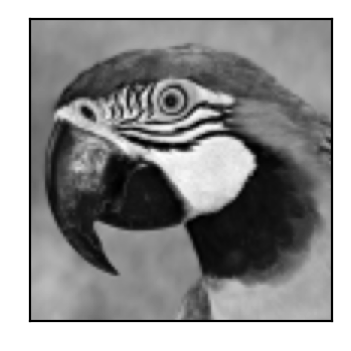

Interpolacja dwusześcienna
Liczba operacji arytmetycznych: 160641600
Liczba dostępów do pamięci: 20801600


In [6]:
I = read('parrot.bmp')
I_, arith_op, mem_acc = bicubicInterpolation(I, 2, 2)
display(I_)
print('Interpolacja dwusześcienna')
print('Liczba operacji arytmetycznych:', arith_op)
print('Liczba dostępów do pamięci:', mem_acc)

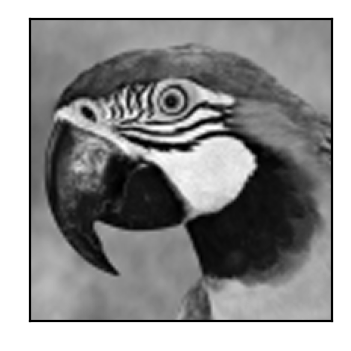

In [7]:
I_ = cv2.resize(I, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
display(I_)